In [1]:
# written by Jade Chongsathapornpong, Jan. 2023
# MCSC Climate Scholars Program, Tuller Group, MIT
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

import os
import re

In [2]:
def stagecal_furnacesample_Pt_RTD_Jan2023(T_stage) -> float:
    """Returns a furnace sample temperature from a stage temperature according to the Pt RTD measurements."""
    return (-4.36189550e-05 * T_stage**2 + 1.12177203*T_stage - 1.41614837e+01)

def stagecal_furnacemain_Pt_RTD_Jan2023(T_stage) -> float:
    """Returns a furnace temperature from a stage temperature according to the Pt RTD measurements."""
    return (-4.34953904e-05 * T_stage**2 + 1.11859298*T_stage + 4.31394777)

In [5]:
### USE THIS ###
temp = 200
print("Stage temperature reading (deg. C):", temp)
print("Using furnace sample holder TC (more accurate according to HanGil):", stagecal_furnacesample_Pt_RTD_Jan2023(temp))
#print("Using furnace main TC:", stagecal_furnacemain_Pt_RTD_Jan2023(temp))

Stage temperature reading (deg. C): 200
Using furnace sample holder TC (more accurate according to HanGil): 208.4481641


# Temperature Calibration with Platinum Wire
For more confident measurements, we need to approximate the temperature difference between the stage (thermocouple right by the heating element) and the sample (sitting on the stage, on top of an alumina substrate). This temperature difference arises from: the stage being up to 550C, the air coming in being at RT or below, and the stage housing being watercooled to <50C.

To do this, we'll use an old sample with long, thin platinum wire, laid on top of an analogue to our samples. Its resistance should change roughly linearly with temperature over this range. We use relatively thick leads to connect it to our test equipment, whose resistance is negligible.

The wire sample is heated in a furnace of known calibration, with thermocouple attached to the sample (probably accurate within 10C), and its resistance measured at different temperatures. We use frequency sweeps, and use the $Z'$ intercept for the resistance. 

This process is repeated, but with the sample in the stage, as we would load a normal sample. Watercooling is turned on, and a mix of 0.9 N2 : 0.1 O2 gas is flowed at the same rate (150sccm) as would be done during a normal measurement. This should give us an okay reproduction of the temperature gradient we want to know. After each temperature step is done according to the stage, the sample is allowed to equilibrate for 2 minutes. Over the course of the stage calibration, the watercooling loop changed from 23C to 27C, which is minimal.

Here's the data:

In [3]:
def filename_to_temperature(filename: str) -> int:
    """Given a filename, returns an integer, e.g. "furnace575C" -> 575 (!assumes no other numbers!)"""
    non_decimal = re.compile(r'[^\d]+') # gets the not-decimals
    return int(non_decimal.sub('', filename)) # replace the not-decimals with empty

# load furnace frequency sweep data and get temperature
root_furnace = r"C:\Users\jade2\Dropbox (Personal)\Research\MetalOxides\Analyses\tempcal\furnace"
furnace_files = os.listdir(root_furnace)
furnace_paths = [os.path.join(root_furnace, filename) for filename in furnace_files]
T_furnace = np.array([filename_to_temperature(fn) % 1000 for fn in furnace_files])
# mod1000 in prev line is to ignore the furnace temperature (filename is like Furnace624_Sample600)
T_furnacemain = np.array([filename_to_temperature(fn) // 1000 for fn in furnace_files])
# now ignore the sample temperature


# load stage "..."
root_stage = r"C:\Users\jade2\Dropbox (Personal)\Research\MetalOxides\Analyses\tempcal\stage"
stage_files = os.listdir(root_stage)
stage_paths = [os.path.join(root_stage, filename) for filename in stage_files]
T_stage = np.array([filename_to_temperature(fn) for fn in stage_files])

print(furnace_files)
print(T_furnace)
print(T_furnacemain)
print(T_stage)

['Furnace080C_sample070C.csv', 'Furnace223C_sample200C.csv', 'Furnace273C_sample250C.csv', 'Furnace320C_sample300C.csv', 'Furnace369C_sample350C.csv', 'Furnace417C_sample400C.csv', 'Furnace442C_sample425C.csv', 'Furnace467C_sample450C.csv', 'Furnace491C_sample475C.csv', 'Furnace516C_sample500C.csv', 'Furnace541C_sample525C.csv', 'Furnace566C_sample550C.csv', 'Furnace600C_sample584C.csv', 'Furnace616C_sample600C.csv']
[ 70 200 250 300 350 400 425 450 475 500 525 550 584 600]
[ 80 223 273 320 369 417 442 467 491 516 541 566 600 616]
[100 150 200 250 300 350 400 425 450 475 500 525 550 575]


If we look at the data on the XM studio MTS software, it seems reasonable that we choose to average the measurements under 400Hz.

In [4]:
df = pd.read_csv(furnace_paths[0], skiprows=3)
print(df.keys())
df

Index(['Time (s)', ' Frequency (Hz)', ' Z' (Ohm)', ' Z'' (Ohm)'], dtype='object')


,Time (s),Frequency (Hz),Z' (Ohm),Z'' (Ohm)
0,5,10000.000000,1584.003,-9.058937
1,6,6309.574000,1584.026,-5.916719
2,7,3981.072000,1584.500,-3.556913
3,8,2511.887000,1584.667,-2.299849
4,9,1584.893000,1584.570,-1.171133
5,10,1000.000000,1584.590,1.381915
6,11,630.957500,1582.831,1.712678
7,12,398.107300,1580.917,1.169016
8,13,251.188700,1580.948,0.208037
9,14,158.489400,1580.793,0.091068


In [4]:
def filter_and_average(impedance_filename, lowpass_cutoff):
    """For file formatted as above, selects measurements with frequency below lowpass_cutoff,
        and averages Z' (resistance)"""
    df = pd.read_csv(impedance_filename, skiprows=3)
    filtered = df.loc[df[' Frequency (Hz)'] < lowpass_cutoff]
    z_primes = filtered[" Z' (Ohm)"].values
    return np.mean(z_primes)

In [5]:
cutoff = 400 # Hz
R_furnace = np.array([filter_and_average(file, cutoff) for file in furnace_paths])
R_stage = np.array([filter_and_average(file, cutoff) for file in stage_paths])

Sample Holder TC:
Fit r-square: 0.9985315715159774
Fit slope (C / Ohm): 0.25095560303923725
Fit slope uncertainty (C / Ohm): 0.0027781249392327535
0 Ohm Intercept (C): -339.11237012677674


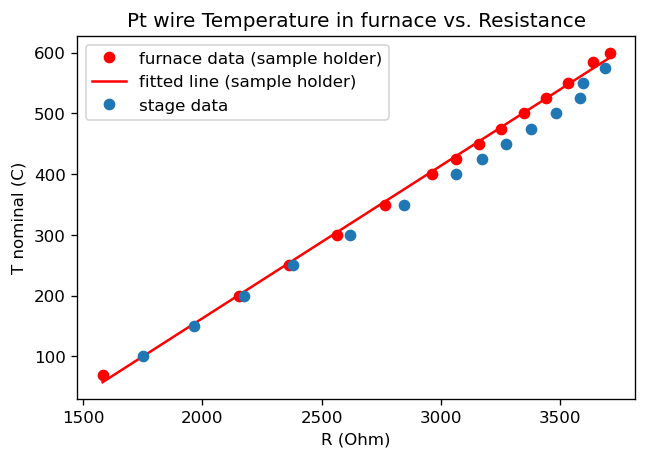

In [10]:
res = scipy.stats.linregress(R_furnace, T_furnace)
res2 = scipy.stats.linregress(R_furnace, T_furnacemain)
print("Sample Holder TC:")
print("Fit r-square:", res.rvalue**2)
print("Fit slope (C / Ohm):", res.slope)
print("Fit slope uncertainty (C / Ohm):", res.stderr)
print("0 Ohm Intercept (C):", res.intercept)
# print("\nFurnace TC:")
# print("Fit r-square:", res2.rvalue**2)
# print("Fit slope (C / Ohm):", res2.slope)
# print("Fit slope uncertainty (C / Ohm):", res2.stderr)
# print("0 Ohm Intercept (C):", res2.intercept)

plt.figure(figsize=(6,4), dpi=120)
plt.plot(R_furnace, T_furnace, 'ro', label='furnace data (sample holder)')
plt.plot(R_furnace, res.intercept + res.slope * R_furnace, 'r', label='fitted line (sample holder)')
#plt.plot(R_furnace, T_furnacemain, 'go', label='furnace data (main TC)')
#plt.plot(R_furnace, res2.intercept + res2.slope * R_furnace, 'g', label='fitted line (furnace TC)')
plt.plot(R_stage, T_stage, 'o', label='stage data')
plt.legend()
plt.ylabel("T nominal (C)")
plt.xlabel("R (Ohm)")
plt.title("Pt wire Temperature in furnace vs. Resistance")
plt.show()

Now, we have a relationship between temperature and resistance for the furnace (which we assume is correct). It appears for a given nominal temperature, the stage sample has a higher resistance (higher true temperature). It's possible the high temperature stage datapoints (550 and 575C nominal) did not have enough time to stabilize (550 was the first point I took, and was taken right after the ramp from 0C, and 575 was done right after this). For the purposes of the calibration, I think we're interested in temperatures below 550C (since some of our samples are too conductive to get nice impedance spectra at these temperatures anyway). Therefore, for the next steps I will reject these two data points, but keep in mind that they exist!

It remains to map stage temperatures to furnace temperatures using this relationship. For each resistance measured on the stage at a given temperature, we'll calculate the corresponding furnace temperature. Then, plot the furnace ("true") temperature vs. the stage temperature. We'll then fit a relation to get a furnace temperature from a stage temperature.

[ 99.66633193 154.06879776 206.51818627 257.8568163  318.43308946
 374.72185124 430.32201278 457.58469029 482.81999324 508.5249563
 535.10721883 560.13101743]
Quadratic ax2 + bx + c parameters: [-4.36189550e-05  1.12177203e+00 -1.41614837e+01]


Text(0, 0.5, 'Corresponded Furnace Temperature (C)')

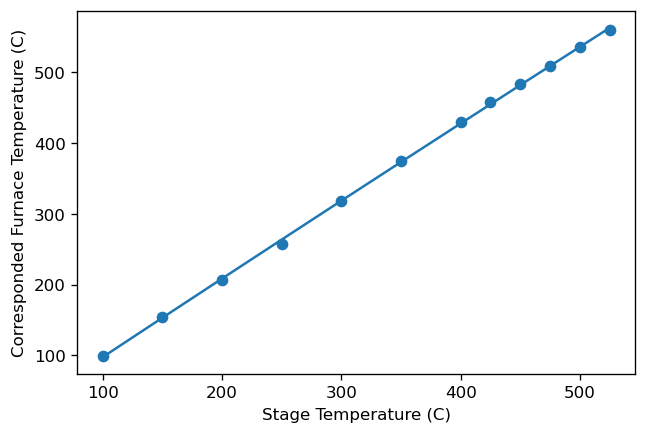

In [13]:
def quadratic_model(x, a, b, c):
    return a*x**2 + b*x + c

plt.figure(figsize=(6,4), dpi=120)
T_furnace_from_R_stage = (res.intercept + res.slope * R_stage)[:-2]
# Uncomment to use furnace main TC temp (Han Gil says this is inaccurate) instead of sample holder
#T_furnace_from_R_stage = (res2.intercept + res2.slope * R_stage)[:-2]
print(T_furnace_from_R_stage)

param_opt, param_covariance = scipy.optimize.curve_fit(quadratic_model, T_stage[:-2], T_furnace_from_R_stage, 
                                                        bounds = ([-1, -2, -30], [1, 2, 30]))
print("Quadratic ax2 + bx + c parameters:", param_opt)
plt.scatter(T_stage[:-2], T_furnace_from_R_stage, label='correspondences')
plt.plot(T_stage[:-2], quadratic_model(T_stage[:-2], *param_opt), label='quadratic fit')
plt.xlabel("Stage Temperature (C)")
plt.ylabel("Corresponded Furnace Temperature (C)")

### Calibration result
Rejecting the last two data points of the stage, we have a significantly better fit. We may want to revisit the 550 and 575C points in the future and be more careful about letting the temperature converge.

Now we can use this to convert from stage temperature to "real" temperature (what it would be in the furnace), assuming the sample is of similar geometry and composition to this Pt wire one. **TODO:** measure the dimensions of the Pt wire sample

For convenience I moved this to the top of the notebook.